# Lab Assignment Three
by:

1. Hayden Donofrio
2. Riley Bates
3. Chandler Choate

## Business Understanding

When trying to shop for clothing items online, it can be difficult to determine the correct sizing for your shape. Most website just have your basic options of small, medium, large, etc., but how do you know which option would work best for you? Life would be so much easier if you knew the item you ordered would come in fitting exactly the way you imagined it would. From using the content in this dataset, we can write an algorithm that when given specific measurements, it will map to previous successful similar entries and return the best fit for your features. The ability to achieve this approximate "fit", allows the customer to feel more confident in their sizing selection process.

According to https://www.shopify.com/enterprise/ecommerce-returns, seventy-two percent of all of their customer returns are due to issues with the fit, sizing, style, etc. When researching different companies on their return rates, the customer-preference based returns are constantly receiving the highest percentages.

With a successful classification algorithm, this could be deployed into hundreds of online shopping stores and provide a better experience throughout. For example, people would not need to go through the hassle of repackaging and shipping their item, the money they are having to spend for this process, working with customer service on an exchange or refund, etc. On the business side, companies will be able to help more customers due to the decrease of services needed, receive higher ratings from customer satisfaction, and much more. By having this algorithm in place, the world of online shopping would increase, and it would be easier to obtain the products you need, when you do not have time in your schedule, and have no doubts about the fit of your product.

[Dataset Source](https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation/data)


In [1]:
#this is the block that simply reads the data
import os
import re
import math
import numpy as np
import pandas as pd
def translate_height(height):
    height = str(height)
    if height == "nan":
        return None
    l = re.findall(r'[0-9]+',height)
    if len(l) == 1:
        return int(l[0])*12
    else:
        return int(l[0])*12 + int(l[1])
df = []
y = []
df = pd.read_json('clothing-fit-dataset-for-size-recommendation/modcloth_final_data.json', lines=True)
di = {"very short": 1, "slightly short": 2, "just right": 3, "slightly long": 4, "very long": 5}
df = df.replace({"length": di})
di = {"small": 1, "fit": 2, "large": 3}
df = df.replace({"fit": di})
df["height"] = df["height"].map(lambda x: translate_height(x))

di = {"aa": 0, "a": 1, "b": 2, "c": 3, "d": 4, "dd/e": 5, "ddd/f": 6, "dddd/g": 7, "h": 8, "i": 9, "j": 10, "k": 11}
df = df.replace({"cup size": di})

y = df['fit']

df = df.drop(columns=["item_id", "category", "user_name", "user_id", "shoe width", "review_summary", "review_text", "fit"])
print("NaNs per column, if more than 20% we will drop otherwise")
for column in df:
    print(df[column].isna().sum(), column)
    df[column] = pd.to_numeric(df[column], errors="coerce")
df = df.drop(columns=["waist", "bust", "shoe size", "length", "hips"])
df = df.fillna(df.mean())
print(df.head())
#big issue here is predicting columns with shoes? wtf there are so many NaNs. Not sure what to do about shoe products?
x = df.values.astype(int)
x

NaNs per column, if more than 20% we will drop otherwise
6018 bra size
70936 bust
6255 cup size
1107 height
26726 hips
35 length
68 quality
54875 shoe size
0 size
79908 waist
    bra size  cup size    height  quality  size
0  34.000000       4.0  66.00000      5.0     7
1  36.000000       2.0  62.00000      3.0    13
2  32.000000       2.0  67.00000      2.0     7
3  35.972125       5.0  65.14642      5.0    21
4  36.000000       2.0  62.00000      5.0    18


array([[34,  4, 66,  5,  7],
       [36,  2, 62,  3, 13],
       [32,  2, 67,  2,  7],
       ...,
       [32,  7, 64,  5, 12],
       [35,  3, 63,  4, 12],
       [32,  4, 72,  4,  4]])

In [2]:
#this is for the renttherunway stuff
df = pd.read_json('clothing-fit-dataset-for-size-recommendation/renttherunway_final_data.json', lines=True)
df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


In [3]:
df["cup size"] = df["bust size"].map(lambda x:  re.findall(r'[A-Za-z]+',str(x))[0] )
df["bust size"] = df["bust size"].map(lambda x: re.findall(r'[0-9]+',str(x)) ).map(lambda x:  np.nan if len(x) == 0 else x[0])
di = {"aa": 0, "a": 1, "b": 2, "c": 3, "d": 4, "dd": 5, "ddd": 6, "f": 6, "g": 7, "h": 8, "i": 9, "j": 10, "k": 11}
df = df.replace({"cup size": di})
di = {"small": 1, "fit": 2, "large": 3}
di = {"small": 1, "fit": 2, "large": 3}
df = df.replace({"fit": di})
y1 = df["fit"]
df = df.drop(columns=['fit', 'age', 'body type', 'category', 'item_id', 'rented for', 'review_date', 'review_summary', 'review_text', 'user_id', 'weight'])
df["height"] = df["height"].map(lambda x: translate_height(x))
#df = df[['bust size', 'cup size', 'height', 'rating', 'size']]

for col in df:
    print(df[col].isna().sum(), column)
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(value=df[col].mean())
print(df.head())
x1 = df.values.astype(int)
np.append(x, x1)
np.append(y, y1)

18411 waist
677 waist
82 waist
0 waist
0 waist
   bust size  height  rating  size  cup size
0  34.000000    68.0    10.0    14  4.000000
1  34.000000    66.0    10.0    12  2.000000
2  34.201271    64.0    10.0     4  2.958239
3  34.000000    65.0     8.0     8  3.000000
4  34.000000    69.0    10.0    12  2.000000


array([1, 1, 1, ..., 2, 2, 2])

In [219]:
desc = pd.DataFrame()
desc["Column"] = df.columns
desc1 = desc.append(pd.Series(['Fit'], index=desc.columns ), ignore_index=True)
desc1["Description"] = [
    "Size of bust in inches",
    "Height in inches",
    "rating/quality of clothes out of 10",
    "size of the garment (women's sizing)",
    "cup size",
    "(Classifier) How does the garment fit?"

]

desc1["Scales"] = ["ratio"] * 5 + ["Nominal"]
desc1


,Column,Description,Scales
0,bust size,Size of bust in inches,ratio
1,height,Height in inches,ratio
2,rating,rating/quality of clothes out of 10,ratio
3,size,size of the garment (women's sizing),ratio
4,cup size,cup size,ratio
5,Fit,(Classifier) How does the garment fit?,Nominal


For creating the dataset, we were supplied two JSON files of reviews from different companies. This was more difficult to work with than I expected because there were not many fields that were shared for both of the companies. The five columns I picked to represent X were the only columns in both of the dataset that did not have many NaNs. I transformed bust size and cup size into two different columns because in the first dataset they were seperated, but in the second dataset they were together. I split them up because I thought cup size, although usually related to bust size, varies enough to deserve its own column.

In [82]:
#now split into training and testing data
import numpy as np
from sklearn.model_selection import train_test_split
X_total = x
y_total = y
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .80)

We found that this split is not a very good split for this dataset. Looking at the dataset, the amount of garments that "fit" severly outnumber those that do not. I believe this could possibly be because people are leniant towards how their clothes fit, or because the participants are simply just lying. Whatever the case is, we would argue for a smaller test size split because a larger number of "not fiting" garments is essential for helping to train our classifier.

In [5]:
#test logistic regresion to see if my splits are working
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(fit_intercept=False)
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.6850012078753472


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Regurlzarization


In [67]:
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # this typically gives us the probability of a specific class
        # we need a bias term 
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        # this will take the x with the bias term and multiplies it by w. This will give us a scalr quantity
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        # if we actually want to do a prediction we are seeing if it is greater than point 5. vector of ones were it is greater than .5 and 0 when it is below .5
        # When one is greater than the other it would be greater than .5
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [117]:
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        #for each vector x we want to out it throught he sigmoid suntract it from y and add it to the gradient function
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        #return gradient divided by the total number of points
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        #this is going to get features and labels. We are going to say x wtih a bias is ther (col of 1s)
        #the shape is the # of samples (rows ) by # of features (cols)
        #w always starts at 0 usually. 
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        # whats the gradient?? and internall we are updating self.w_ in this
        
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            
            o = gradient*self.eta
            #print(o[0].__class__, o.__class__, "MY CLASS", o)
            l=0.
            for i in range(len(self.w_)):
                l += float(o[i])
                self.w_[i] += l

           

In [118]:
from scipy.special import expit
class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)

In [173]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        for i,yval in enumerate(self.unique_): # for each unique value
           y_binary = (y==yval) # create a binary problem whenever class is 0 (big class), y binary will be 1
           # train the binary classifier for this class
           blr = VectorBinaryLogisticRegression(self.eta,self.iters)
           blr.fit(X,y_binary)
           # add the trained classifier to the list
           self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
#print(X)
#print(y)

In [175]:
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0,reg="BOTH", **kwds):        
        # need to add to the original initializer 
        self.C = C
        self.reg = reg
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        # add in regularization (to all except bias term)
        #this is L1
        div = np.divide(np.absolute(self.w_[1:]).T[0],
                        self.w_[1:,0],
                        out=np.zeros_like(np.absolute(self.w_[1:]).T[0]),
                        where=self.w_[1:,0]!=0)
        div = div.T.reshape(self.w_[1:].shape)
        if self.reg == "L1" or self.reg == "BOTH":
            gradient[1:] += -1 * div  * self.C
        if self.reg == "BOTH" or self.reg == "L2":
            gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient
        

In [176]:
# now redefine the Logistic Regression Function where needed
import itertools
def get_uniq(s, s1, s2):
    if s == s1:
        return True
    elif  s == s2:
        return False
    else:
        return None
    
class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, C=0.0,reg="BOTH",one_vs_one=False, **kwds):        
        # need to add to the original initializer 
        self.C = C
        self.reg = reg
        self.one_vs_one = one_vs_one
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        iters = list(itertools.combinations(self.unique_, 2))
        #self.one_vs_one = False
        if self.one_vs_one:
            for i in iters:
                y_binary = y.map(lambda q: get_uniq(q, i[0], i[1]) ).dropna()
                x_uniq = y_binary.index.values
                blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                          iterations=self.iters,
                                                          C=self.C,
                                                         reg=self.reg)
                blr.fit(X_total[x_uniq,:],y_binary)
                self.classifiers_.append(blr)
        else:
            for i,yval in enumerate(self.unique_): # for each unique value
                y_binary = y==yval # create a binary problem
                # train the binary classifier for this class
                blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                          iterations=self.iters,
                                                          C=self.C)
                blr.fit(X,y_binary)
                # add the trained classifier to the list
                self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [178]:
#minibatch s essentially just running regression a smaller batch. This will be much faster with hopefully similar accuracy.
from numpy import random
class StochasticGradientDescent(RegularizedLogisticRegression):
    def __init__(self,size=1000,reg="BOTH", **kwds):
        self.reg = reg
        self.size = size
            #make sure to pass c, eta and iterations
        super().__init__(**kwds) # call parent initializer
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        #get a random sample 
        x_slice = X[self.size:self.size*2,:]
        y_slice = y[self.size:self.size*2]
        #print(y_slice)
        self.unique_ = np.unique(y_slice) # get each unique class value
        
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        iters = list(itertools.combinations(self.unique_, 2))
        #change this back
        #self.one_vs_one = False
        if self.one_vs_one:
            for i in iters:
                y_binary = y_slice.map(lambda q: get_uniq(q, i[0], i[1]) ).dropna()
                x_uniq = y_binary.index.values
                blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                         iterations=self.iters,
                                                         C=self.C,
                                                        reg=self.reg)
                blr.fit(X_total[x_uniq,:],y_binary)

                self.classifiers_.append(blr)
        else:
            for i,yval in enumerate(self.unique_): # for each unique value
                y_binary = y_slice==yval # create a binary problem
                # train the binary classifier for this class
                blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                          iterations=self.iters,
                                                              C=self.C,
                                                         reg=self.reg)
                blr.fit(x_slice,y_binary)

                self.classifiers_.append(blr)
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        #stochastic takes a single sample 



In [184]:
class Newton(RegularizedLogisticRegression):
    def sig(theta):
        return 1/(1+np.exp(-theta)) 
    
    def __init__(self,size=1000,reg="BOTH", **kwds):
        self.size = size
        self.reg = reg
            #make sure to pass c, eta and iterations
        super().__init__(**kwds) # call parent initializer
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        S = diag(self.sig(X @ self.w_)*(1-self.sig(X @ self.w_)))
        hessian = (X.T*S*X)
        H_inv = np.linalg.inv(hessian)

        newt_update = H_inv * gradient
        gradient = newt_update
        return gradient
        
    def fit(self, X, y):   
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        iters = list(itertools.combinations(self.unique_, 2))

        #self.one_vs_one = False
        if self.one_vs_one:
            for i in iters:
                y_binary = y.map(lambda q: get_uniq(q, i[0], i[1]) ).dropna()
                x_uniq = y_binary.index.values
                blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                         iterations=self.iters,
                                                         C=self.C,
                                                        reg=self.reg)

                blr.fit(X_total[x_uniq,:],y_binary)

                self.classifiers_.append(blr)
        else:
            for i,yval in enumerate(self.unique_): # for each unique value
                y_binary = y==yval # create a binary problem
                # train the binary classifier for this class
                blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                          iterations=self.iters,
                                                              C=self.C,
                                                         reg=self.reg)
                blr.fit(X,y_binary)

                self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T


In [187]:
import time
from sklearn.metrics import confusion_matrix
lr_scores=[]
ls_scores = []
nt_scores = []
lr_confusion_matrices = {}
ls_confusion_matrices = {}
nt_confusion_matrices = {}
accuracy_scores = {}
#this block here will get the times of the blocks and save them and their accuracy
for reg in ["BOTH"]:
    for c in [.001, .01, .1, 3]:
        print("Executing c={0}".format(c))
        for e in [.01]:
            print("Executing c ={0}".format(e))
            start = time.time()
            lr = RegularizedLogisticRegression(eta=e,
                                               iterations=2500,
                                               C=c, 
                                      reg = reg)
            lr.fit(X_train, y_train)
            yhat = lr.predict(X_test)
            end = time.time()
            lr_scores.append((end-start, accuracy_score(y_test, yhat)))
            #print(accuracy_score(y_test, yhat))
            #generate confusion
            m = (confusion_matrix(y_test, yhat))
            accuracy_scores[(reg, c, e, "lr")] = accuracy_score(y_test, yhat)
            lr_confusion_matrices[(reg, c, e)] = m
            
            start = time.time()
            ls = StochasticGradientDescent(eta=e,iterations=2500, size=1000, C=c,reg=reg)
            ls.fit(X_train, y_train)
            yhat = ls.predict(X_test)
            ls_confusion_matrices[(reg, c, e )] = confusion_matrix(y_test, yhat)
            accuracy_scores[(reg, c, e, "ls")] = accuracy_score(y_test, yhat)
            #print(accuracy_score(y_test, yhat))
            end = time.time()
            ls_scores.append((end-start, accuracy_score(y_test, yhat)))
            
            start = time.time()
            nt = Newton(eta=e,iterations=2500, C=c, reg = reg)
            nt.fit(X_train, y_train)
            yhat = nt.predict(X_test)
            end = time.time()
            nt_scores.append((end-start, accuracy_score(y_test, yhat)))
            #print(accuracy_score(y_test, yhat))
            
            #generate confusion
            nt_confusion_matrices[(reg, c, e )] = confusion_matrix(y_test, yhat)
            accuracy_scores[(reg, c, e, "nt")] = accuracy_score(y_test, yhat)
            nt_scores.append((end-start, accuracy_score(y_test, yhat)))
            
            

Executing c=0.001
Executing c =0.01
Executing c=0.01
Executing c =0.01
Executing c=0.1
Executing c =0.01
Executing c=3
Executing c =0.01


In [226]:
import plotly.graph_objects as go
import plotly
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sys
plotly.offline.init_notebook_mode(connected=True)
def best_time_charts(nts, lrs, lss):
    nt_avg_time = 0
    lr_avg_time = 0
    ls_avg_time = 0
    nt_avg_score = 0
    ls_avg_score = 0
    lr_avg_score = 0
    highest_lr_score = 0
    highest_ls_score = 0
    highest_nt_score = 0
    best_lr_time = float('inf')
    best_ls_time = float('inf')
    best_nt_time = float('inf')
    sklearn_score = 0
    for i in range(len(nts)):
        nt_avg_time += nts[i][0]
        nt_avg_score += nts[i][1]
        if nts[i][1] > highest_nt_score:
            highest_nt_score = nts[i][1]
        if nts[i][0] < best_nt_time:
            best_nt_time = nts[i][0]
    nt_avg_time /= len(nts)
    nt_avg_score /= len(nts)
    for i in range(len(lrs)):
        lr_avg_time += lrs[i][0]
        lr_avg_score += lrs[i][1]
        if lrs[i][1] > highest_lr_score:
            highest_lr_score = lrs[i][1]
        if lrs[i][0] < best_lr_time:
            best_lr_time = lrs[i][0]
    lr_avg_time /= len(lrs)
    lr_avg_score /= len(lrs)
    for i in range(len(lss)):
        ls_avg_time += lss[i][0]
        ls_avg_score += lss[i][1]
        if lss[i][1] > highest_ls_score:
            highest_ls_score = lss[i][1]
        if lss[i][0] < best_ls_time:
            best_ls_time = lss[i][0]
    ls_avg_time /= len(lss)
    ls_avg_score /= len(lss)
    
    start = time.time()
    clf = LogisticRegression(fit_intercept=False)
    clf.fit(X_train, y_train)

    yhat = clf.predict(X_test)
    end = time.time()
    total_time = end-start
    sklearn_acc = accuracy_score(y_test,yhat)

    methods=['Steepest Descent', 'Minibatch', 'Newton\'s Method']

    fig = go.Figure([go.Bar(x=methods, y=[lr_avg_time, ls_avg_time, nt_avg_time])])
    fig.update_layout(title_text='Average Run-time Per Method')
    fig.show()

    fig = go.Figure([go.Bar(x=methods, y=[lr_avg_score, ls_avg_score, nt_avg_score])])
    fig.update_layout(title_text='Average accuracy Per Method')
    fig.show()
    methods.append("Sklearn")
    fig = go.Figure([go.Bar(x=methods, y=[highest_lr_score, highest_ls_score, highest_nt_score,sklearn_acc ])])
    fig.update_layout(title_text='Best accuracy Per Method')
    fig.show()

    fig = go.Figure([go.Bar(x=methods, y=[best_lr_time, best_ls_time, best_nt_time, total_time ])])
    fig.update_layout(title_text='Best time Per Method')
    fig.show()
best_time_charts(nt_scores,lr_scores, ls_scores )


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Analyzing this data, we see that the minibatch technique provides suprisingly good accuracy at a fairly good accuracy. Overall, the accuracy of these were not as high as I had hoped. Perhaps this is because many people are not very clear on what their intended "fit" is. Some people may want clothes that fit larger than others while some people may want clothes that fit smaller. These factors most likely give us a good reason why our accuracy is only about ~70%.

Comparing accuracy, I am very surprised to see that nearly all of our methods had a good best accuracy rating! Although average accuracy was not very consistent, it is good to see that we can have a good accuracy that is slightly better than Sklearn! However, time leaves a lot to be desired: our best method for time (minibatch) is an astouding 30x slower than Sklearn!

In [225]:
i = 0
index = 0
regs = []
max_score = 0
print(ls_scores)
for reg in ["BOTH"]:
    for c in [.001, .01, .1, 3]:
        for e in [.01]:
            if ls_scores[i][1] > max_score:
                print(i)
                max_score = ls_scores[i][1]
                index = 0
                regs = [reg,c,e]
            i += 1
print(regs)

[(3.4763922691345215, 0.160692716511656), (3.4376718997955322, 0.5997101099166566), (3.4340527057647705, 0.685861819060273), (3.4315521717071533, 0.685861819060273)]
0
1
2
['BOTH', 0.1, 0.01]


We see that our best c value for the minibatch method that provides a better accuracy than Sklearn is a c value of .1.

For our method of selecting c values, I believe that is not biased. When writing the c values to pick from, I picked c values that essentially were the ones that were given on the example in class. However, I do believe there may be some data snooping when it comes to selecting the regularization method and the eta value.

The reason why we picked the L1+L2 Regularization method was because it provided the best results that were slightly better than classifying most things as "fit" (we will describe this issue after the confusion matrices). The eta value was also chosen from a larger set of eta values that were narrowed down to the one that we thought would provide the best results. Going in blindly to this dataset would provided a lot more useless information to present in this lab. Knowing our dataset allows us to succinctly discuss our results without too much bloat.

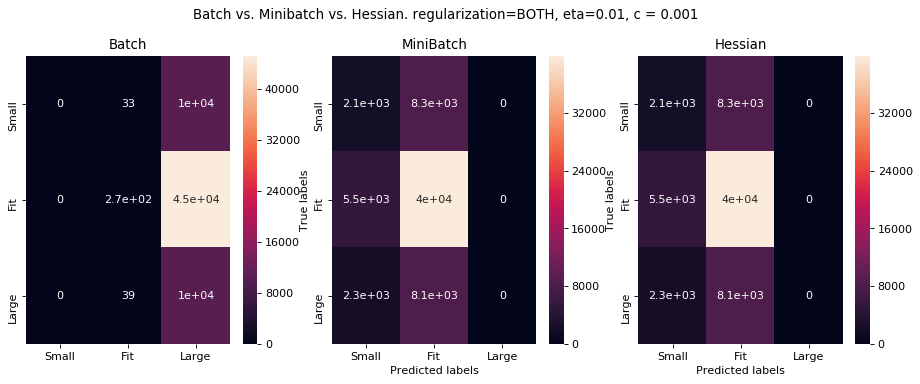

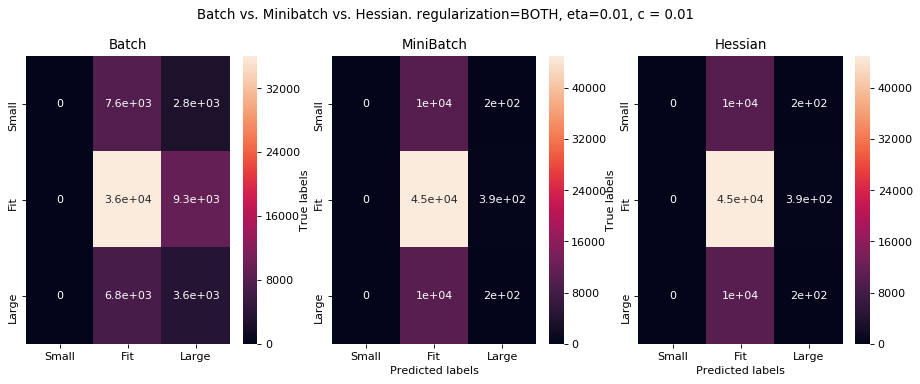

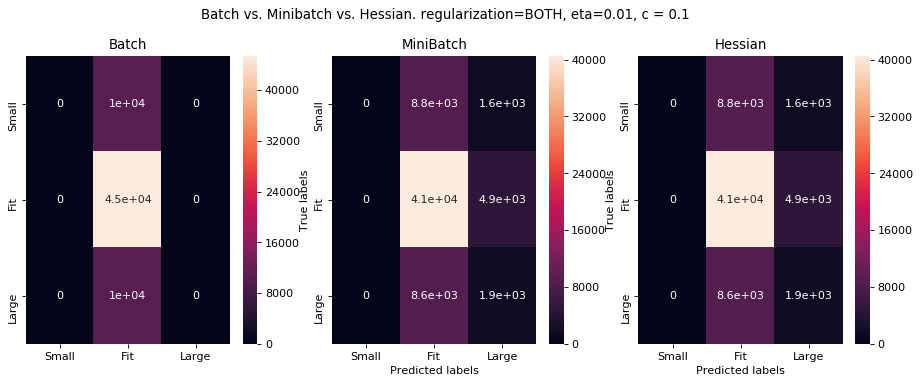

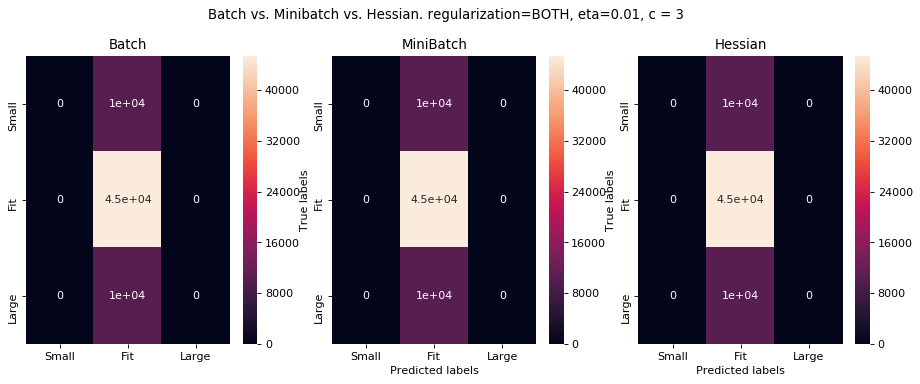

In [189]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
def confusions(ls_conf, lr_conf, nt_conf):
    for reg in ["BOTH"]:
        for c in [.001, .01, .1, 3]:
            for e in [.01]:
                #now we can print the matricies
                #this may be a lot but its a good idea for our BEST one
                l1 = ls_conf[(reg, c,e)]
                lr = lr_conf[(reg, c,e)]
                nt = nt_conf[(reg,c,e)]
                df_cm = pd.DataFrame(l1, index = [i for i in ["Small", "Fit", "Large"]],
                          columns = [i for i in ["Small", "Fit", "Large"]])
                plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
                title = "Batch vs. Minibatch vs. Hessian. regularization={0}, eta={1}, c = {2}".format(reg, e, c)
                ax = plt.subplot(1, 3, 1)
                plt.title("Batch")
                #ax.set_ylim(-0.5, -0.5)
                plt.subplots_adjust(bottom=0.28)
                ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
                #plt.gcf().subplots_adjust(top=0.15)
                sn.heatmap(df_cm, annot=True)
                ax = plt.subplot(1,3,2)
                plt.title("MiniBatch")
                df_cm = pd.DataFrame(lr, index = [i for i in ["Small", "Fit", "Large"]],
                          columns = [i for i in ["Small", "Fit", "Large"]])
                sn.heatmap(df_cm, annot=True,)
                #ax.set_ylim(len(df_cm)-0.5, -0.5)
                ax.set_xlabel('Predicted labels');
                ax.set_ylabel('True labels')
                px = plt.subplot(1,3,3)
                plt.title("Hessian")
                df_cm = pd.DataFrame(nt, index = [i for i in ["Small", "Fit", "Large"]],
                          columns = [i for i in ["Small", "Fit", "Large"]])
                sn.heatmap(df_cm, annot=True,)
                px.set_xlabel('Predicted labels');
                px.set_ylabel('True labels')
                plt.suptitle(title)
                plt.show()
confusions(ls_confusion_matrices, lr_confusion_matrices, nt_confusion_matrices)

In our confusion matrices, you can identify the misidentified classes by their less saturated values where the rows are not correlated with themselves. In most of these matrices, misidentification happened fairly semmetrically, meaning we had an almost equal number of misclassifying a 'fit' as either too small or too large. This indicates that their is not a skew in our model, as it is not favoring one class over the others. 

The part that stuck out to me the most was that almost everything was classified as "fit" very often. This is very dissapointing because logistic regression did not do a very good job at spliting our classes. In many cases it did not even consider the "large" class at all. If we had a dataset that had more clothes that did NOT fit our classifier would have performed much better than what was shown. As stated before, I believe many people go for a different intended fit on their garment which may skew this dataset heavily. Therefore, I believe classifying how clothes fit on a person is a very individualistic thing that this dataset did not illustrate. To have the classifier work correclty, I blieve we would have to tailor this to each individual person, so their prefrences to how something fits stay consistent across garments.

To reiterate performance from previous sections, I am astounded at how Sklearn was 30x faster than our best method: the minibatch. Looking at the best time from the minibatch, it took a whopping 3 seconds while sklearn classified in only a tenth of a second. If we were only concerned about accuracy we see that all of our methods performed slightly better than sklearn in a best case scenario while the averages were all lower.

We see that the minibatch had the best average time but the worst average performances, I believe certain hyperparameters may train the regression to perform horribly, especially on a smaller dataset with even fewer non-fitting items in the dataset. I believe that with the correct hyperparameters, and the correct slice of sub-data, we will see the minibatch method outperform the hessian and the batch method.

## Deployment

Without a doub, scikit-learn would be the one that would be used in a production environment. The accuracy per a second is much more impressive than any of the methods that we implemented. This is mainly due to the differences in performance time. In the environment a classifier like this would exist in, time would be very important. A user would want to simply have their measurements saved, look up the size of something they want to wear, and have it quickly returned to them if the garment is too small or too big. Because of this, I believe scikit-learn would be the best one for this because not only does accuracy have importance, but so does time as well. If all we cared about was accuracy then we would use one of the methods that we implemented, but that is simply not the case in situations like this one. 

## ONE-VS-ONE Comparison

We implemented a version of one-vs-one comparsion rather than the one-vs-all that was used in the above sections of this report. We found overall that one-vs-one was much slower than the one-vs-all approach, this is expected since we have to run our cost function on more and varying datasets rather than the one-vs-all approach which usually runs much faster. One-vs-one is supposed to provide greater accuracy while sacrificing time, in the next few graphs we will see if that holds up true or not.

In [131]:
from sklearn.metrics import confusion_matrix
lr_one_scores=[]
ls_one_scores = []
nt_one_scores = []
lr_one_confusion_matrices = {}
ls_one_confusion_matrices = {}
nt_one_confusion_matrices = {}
one_accuracy_scores = {}
#this block here will get the times of the blocks and save them and their accuracy
for reg in ["BOTH"]:
    for c in [.001, .01, .1, 3]:
        print("generating c={0}".format(c))
        for e in [.001, .1]:
            print("generating eta={0}".format(e))
            start = time.time()
            lr = RegularizedLogisticRegression(eta=e,
                                               iterations=2500,
                                               C=c, 
                                      reg = reg,
                                        one_vs_one=True)
            lr.fit(X_train, y_train)
            yhat = lr.predict(X_test)
            end = time.time()
            lr_one_scores.append((end-start, accuracy_score(y_test, yhat)))
            #generate confusion
            m = (confusion_matrix(y_test, yhat))
            one_accuracy_scores[(reg, c, e, "lr")] = accuracy_score(y_test, yhat)
            lr_one_confusion_matrices[(reg, c, e)] = m
            
            start = time.time()
            ls = StochasticGradientDescent(eta=e,iterations=2500, size=1000, C=c,reg=reg,
                                        one_vs_one=True)
            ls.fit(X_train, y_train)
            yhat = ls.predict(X_test)
            ls_one_confusion_matrices[(reg, c, e )] = confusion_matrix(y_test, yhat)
            one_accuracy_scores[(reg, c, e, "ls")] = accuracy_score(y_test, yhat)
            end = time.time()
            ls_one_scores.append((end-start, accuracy_score(y_test, yhat)))
            
            start = time.time()
            nt = Newton(eta=e,iterations=2500, C=c, reg = reg,
                                        one_vs_one=True)
            nt.fit(X_train, y_train)
            yhat = nt.predict(X_test)
            end = time.time()
            
            #generate confusion
            nt_one_confusion_matrices[(reg, c, e )] = confusion_matrix(y_test, yhat)
            one_accuracy_scores[(reg, c, e, "nt")] = accuracy_score(y_test, yhat)
            nt_one_scores.append((end-start, accuracy_score(y_test, yhat)))
            
    

generating c=0.001
generating eta=0.001
generating eta=0.1
generating c=0.01
generating eta=0.001
generating eta=0.1
generating c=0.1
generating eta=0.001
generating eta=0.1
generating c=3
generating eta=0.001
generating eta=0.1


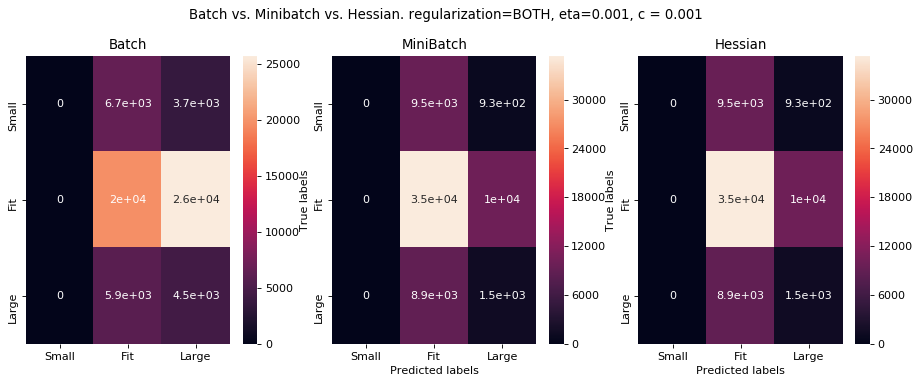

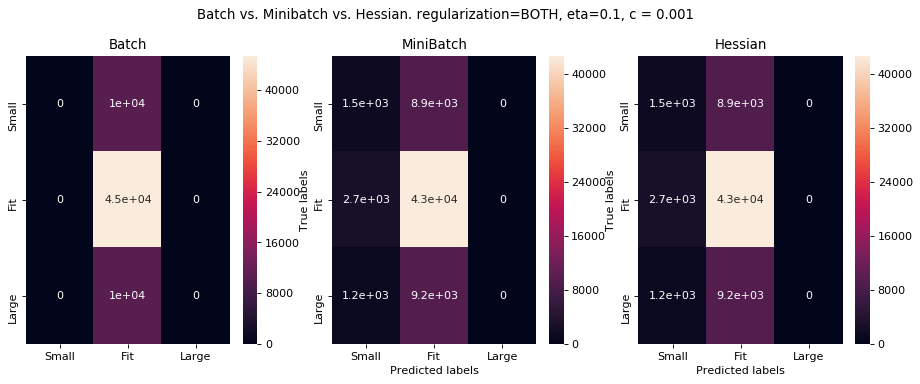

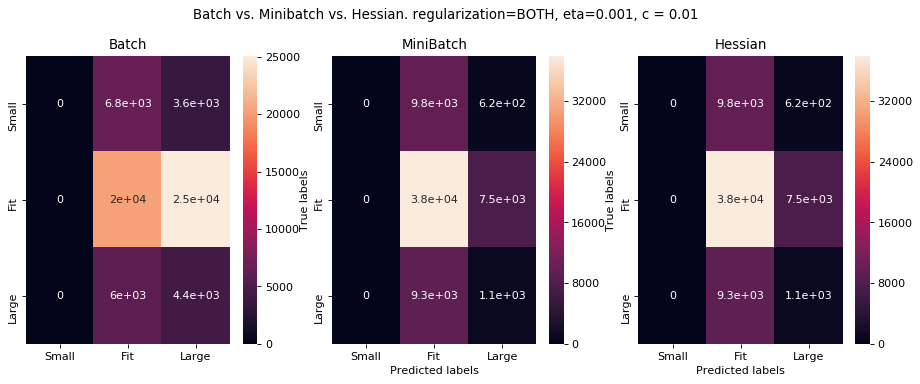

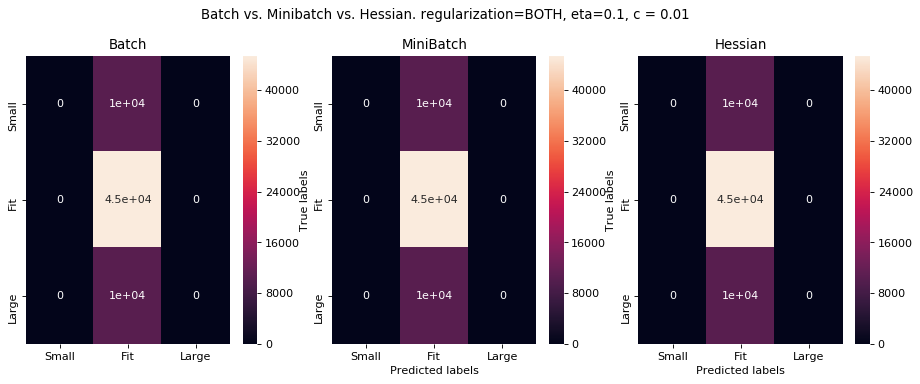

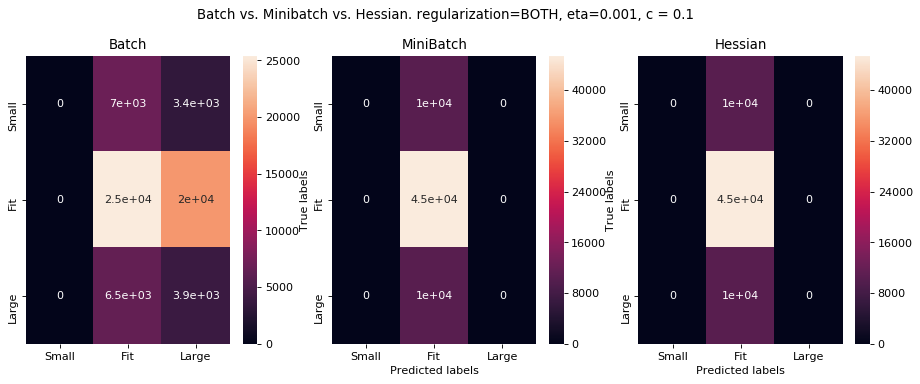

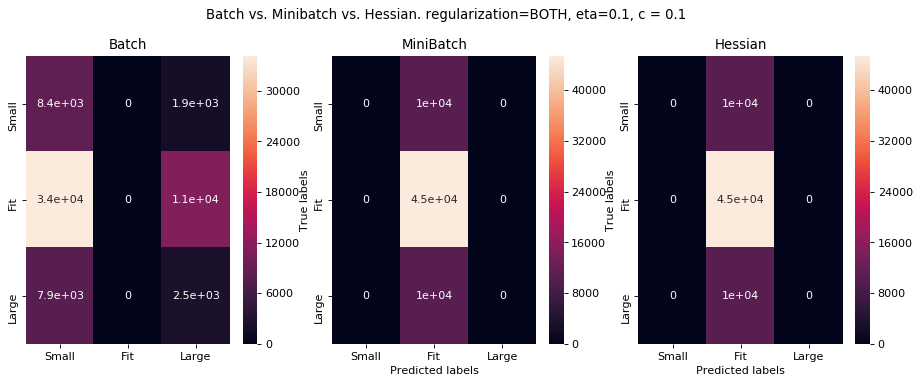

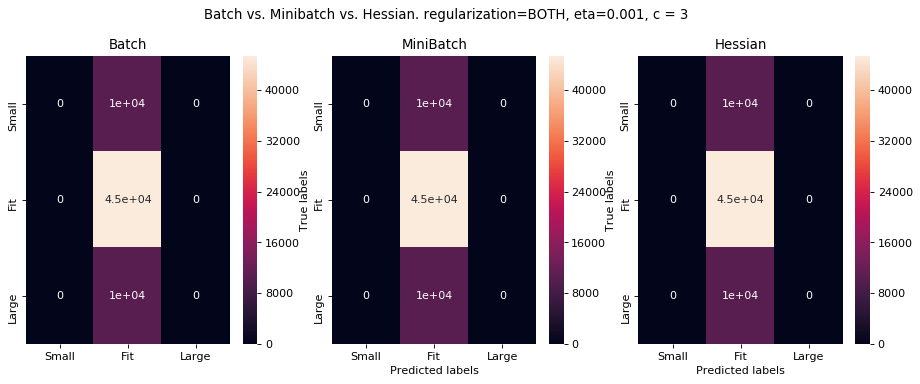

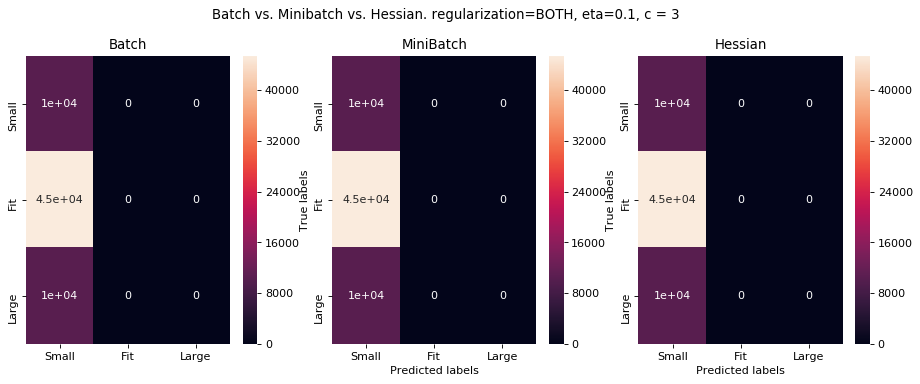

In [133]:
def confusions(ls_conf, lr_conf, nt_conf):
    for reg in ["BOTH"]:
        for c in [.001, .01, .1, 3]:
            for e in [.001, .1]:
                #now we can print the matricies
                #this may be a lot but its a good idea for our BEST one
                l1 = ls_conf[(reg, c,e)]
                lr = lr_conf[(reg, c,e)]
                nt = nt_conf[(reg,c,e)]
                df_cm = pd.DataFrame(l1, index = [i for i in ["Small", "Fit", "Large"]],
                          columns = [i for i in ["Small", "Fit", "Large"]])
                plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
                title = "Batch vs. Minibatch vs. Hessian. regularization={0}, eta={1}, c = {2}".format(reg, e, c)
                ax = plt.subplot(1, 3, 1)
                plt.title("Batch")
                #ax.set_ylim(-0.5, -0.5)
                plt.subplots_adjust(bottom=0.28)
                ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
                #plt.gcf().subplots_adjust(top=0.15)
                sn.heatmap(df_cm, annot=True)
                ax = plt.subplot(1,3,2)
                plt.title("MiniBatch")
                df_cm = pd.DataFrame(lr, index = [i for i in ["Small", "Fit", "Large"]],
                          columns = [i for i in ["Small", "Fit", "Large"]])
                sn.heatmap(df_cm, annot=True,)
                #ax.set_ylim(len(df_cm)-0.5, -0.5)
                ax.set_xlabel('Predicted labels');
                ax.set_ylabel('True labels')
                px = plt.subplot(1,3,3)
                plt.title("Hessian")
                df_cm = pd.DataFrame(nt, index = [i for i in ["Small", "Fit", "Large"]],
                          columns = [i for i in ["Small", "Fit", "Large"]])
                sn.heatmap(df_cm, annot=True,)
                px.set_xlabel('Predicted labels');
                px.set_ylabel('True labels')
                plt.suptitle(title)
                plt.show()
confusions(ls_one_confusion_matrices, lr_one_confusion_matrices, nt_one_confusion_matrices)

As before, we had a lot of trouble classifying all three classes. This time it looks like it had even more trouble classifying the ill-fitting clothes than it did in the previous sections. I believe this may be because we have so many "fit" entries compared to the small or large entries that it caused our groupings to have to not consider one class in order to get a decent classifier. 

In [147]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
def best_time_charts(nts, lrs, lss):
    nt_avg_time = 0
    lr_avg_time = 0
    ls_avg_time = 0
    nt_avg_score = 0
    ls_avg_score = 0
    lr_avg_score = 0
    highest_lr_score = 0
    highest_ls_score = 0
    highest_nt_score = 0
    best_lr_time = float('inf')
    best_ls_time = float('inf')
    best_nt_time = float('inf')
    sklearn_score = 0
    for i in range(len(nts)):
        nt_avg_time += nts[i][0]
        nt_avg_score += nts[i][1]
        if nts[i][1] > highest_nt_score:
            highest_nt_score = nts[i][1]
        if nts[i][0] < best_nt_time:
            best_nt_time = nts[i][0]
    nt_avg_time /= len(nts)
    nt_avg_score /= len(nts)
    for i in range(len(lrs)):
        lr_avg_time += lrs[i][0]
        lr_avg_score += lrs[i][1]
        if lrs[i][1] > highest_lr_score:
            highest_lr_score = lrs[i][1]
        if lrs[i][0] < best_lr_time:
            best_lr_time = lrs[i][0]
    lr_avg_time /= len(lrs)
    lr_avg_score /= len(lrs)
    for i in range(len(lss)):
        ls_avg_time += lss[i][0]
        ls_avg_score += lss[i][1]
        if lss[i][1] > highest_ls_score:
            highest_ls_score = lss[i][1]
        if lss[i][0] < best_ls_time:
            best_ls_time = lss[i][0]
    ls_avg_time /= len(lss)
    ls_avg_score /= len(lss)
    
    start = time.time()
    clf = OneVsOneClassifier(Perceptron(shuffle=False))
    clf.fit(X_train, y_train)

    yhat = clf.predict(X_test)
    end = time.time()
    total_time = end-start
    sklearn_acc = accuracy_score(y_test,yhat)

    methods=['Steepest Descent', 'Minibatch', 'Newton\'s Method']

    fig = go.Figure([go.Bar(x=methods, y=[lr_avg_time, ls_avg_time, nt_avg_time])])
    fig.update_layout(title_text='Average Run-time Per Method')
    fig.show()

    fig = go.Figure([go.Bar(x=methods, y=[lr_avg_score, ls_avg_score, nt_avg_score])])
    fig.update_layout(title_text='Average accuracy Per Method')
    fig.show()
    methods.append("Sklearn")
    fig = go.Figure([go.Bar(x=methods, y=[highest_lr_score, highest_ls_score, highest_nt_score,sklearn_acc ])])
    fig.update_layout(title_text='Best accuracy Per Method')
    fig.show()

    fig = go.Figure([go.Bar(x=methods, y=[best_lr_time, best_ls_time, best_nt_time, total_time ])])
    fig.update_layout(title_text='Best time Per Method')
    fig.show()
best_time_charts(nt_one_scores, lr_one_scores, ls_one_scores)

We see that the newton's method and the steepest decent both performed horribly when it came to performance time. They took a whopping minute to perform. This is ridculously slow compared to sklear who, once again, performed in under a second. The best accuracy as well as the average accuracy was actually worse than the one-vs-all method. I did not expect that! I believe it is because we did not have enough of the "large" or "small" classes to give the one-vs-one approach the data that it needs. Once again, we see that sklearn outperforms our methods that we created.